In [ ]:
!nvidia_smi

/bin/bash: line 1: nvidia_smi: command not found


In [ ]:
!pip install --upgrade --force-reinstall "numpy==1.26.4" "pandas==2.1.4"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2


In [ ]:
!pip install ultralytics==8.3.0 --quiet

from ultralytics import YOLO
import os, shutil, zipfile, glob
from pathlib import Path

print("YoloV8 version OK")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 13.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YoloV8 version OK


Cell 3 – Create folders


In [ ]:
from pathlib import Path

BASE_DIR = Path("/content/traffic-sign-robustness")
DATA_RAW = BASE_DIR / "data_raw"
DATA_YOLO = BASE_DIR / "data_yolo"

for d in [BASE_DIR, DATA_RAW, DATA_YOLO]:
    d.mkdir(parents=True, exist_ok=True)

BASE_DIR, DATA_RAW, DATA_YOLO


(PosixPath('/content/traffic-sign-robustness'),
 PosixPath('/content/traffic-sign-robustness/data_raw'),
 PosixPath('/content/traffic-sign-robustness/data_yolo'))

In [ ]:
#  REPLACE THESE with real URLs
zip_url = "https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip"
gt_url  = "https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/gt.txt"

zip_path = DATA_RAW / "FullIJCNN2013.zip"
gt_path  = DATA_RAW / "gt.txt"

# Download the zip
!wget -O "{zip_path}" "{zip_url}"

# Download gt.txt
!wget -O "{gt_path}" "{gt_url}"

print("Zip saved to:", zip_path)
print("GT file saved to:", gt_path)


--2025-12-13 04:27:10--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1661866983 (1.5G) [application/zip]
Saving to: ‘/content/traffic-sign-robustness/data_raw/FullIJCNN2013.zip’

/content/traffic-si 100%[===================>]   1.55G  26.3MB/s    in 54s     

2025-12-13 04:28:05 (29.5 MB/s) - ‘/content/traffic-sign-robustness/data_raw/FullIJCNN2013.zip’ saved [1661866983/1661866983]

--2025-12-13 04:28:05--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/gt.txt
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24794 (24K) [text/plain]
Saving to: ‘/content/traffic-sign-robustness/data_raw/gt.txt’

/content/traffi

In [ ]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(DATA_RAW / "FullIJCNN2013")

images_dir = DATA_RAW / "FullIJCNN2013" / "FullIJCNN2013"
gt_file = gt_path

print("Images dir:", images_dir)
print("GT file:", gt_file)


Images dir: /content/traffic-sign-robustness/data_raw/FullIJCNN2013/FullIJCNN2013
GT file: /content/traffic-sign-robustness/data_raw/gt.txt


In [ ]:
# !ls -R {DATA_RAW}


In [ ]:
# !head {gt_path}


In [ ]:
from pathlib import Path

images_dir = DATA_RAW / "FullIJCNN2013" / "FullIJCNN2013"
gt_file = DATA_RAW / "gt.txt"

print("Images dir:", images_dir)
print("GT file:", gt_file)

# quick sanity check: count images
len(list(images_dir.glob("*.ppm")))


Images dir: /content/traffic-sign-robustness/data_raw/FullIJCNN2013/FullIJCNN2013
GT file: /content/traffic-sign-robustness/data_raw/gt.txt


900

In [ ]:
import random

images_train = DATA_YOLO / "images" / "train"
images_val   = DATA_YOLO / "images" / "val"
labels_train = DATA_YOLO / "labels" / "train"
labels_val   = DATA_YOLO / "labels" / "val"

for d in [images_train, images_val, labels_train, labels_val]:
    d.mkdir(parents=True, exist_ok=True)


Cell 7 – Parse gt.txt and map to YOLO


In [ ]:
import pandas as pd
from PIL import Image

# Read all annotations
rows = []
with open(gt_file, 'r') as f:
    for line in f:
        parts = line.strip().split(';')
        img_name = parts[0]
        x1, y1, x2, y2, cls = map(int, parts[1:])
        rows.append((img_name, x1, y1, x2, y2, cls))

df = pd.DataFrame(rows, columns=["img", "x1", "y1", "x2", "y2", "cls"])
print("Total boxes:", len(df))
print("Unique images:", df["img"].nunique(), " Unique classes:", df["cls"].nunique())


Total boxes: 852
Unique images: 506  Unique classes: 43


Cell 8 – Train/val split by image


In [ ]:
all_imgs = df["img"].unique().tolist()
random.seed(42)
random.shuffle(all_imgs)

split_idx = int(0.8 * len(all_imgs))
train_imgs = set(all_imgs[:split_idx])
val_imgs   = set(all_imgs[split_idx:])

len(train_imgs), len(val_imgs)


(404, 102)

Cell 9 – Helper: convert one image’s boxes to YOLO format


In [ ]:
def convert_bbox_to_yolo(x1, y1, x2, y2, img_w, img_h):
    # YOLO: cx, cy, w, h normalized
    cx = (x1 + x2) / 2.0 / img_w
    cy = (y1 + y2) / 2.0 / img_h
    w  = (x2 - x1) / img_w
    h  = (y2 - y1) / img_h
    return cx, cy, w, h


Cell 10 – Write images + labels in YOLO format


In [ ]:
from tqdm import tqdm
import shutil

def process_split(img_set, img_out_dir, label_out_dir):
    for img_name in tqdm(img_set):
        src_img_path = images_dir / img_name
        if not src_img_path.exists():
            continue

        # Load image to get size
        with Image.open(src_img_path) as im:
            w, h = im.size

            # Copy image
            dst_img_path = img_out_dir / (Path(img_name).stem + ".jpg")
            im.convert("RGB").save(dst_img_path)
            im.save(dst_img_path)


        # Get boxes for this image
        sub = df[df["img"] == img_name]

        # Write label file
        label_path = label_out_dir / (Path(img_name).stem + ".txt")
        with open(label_path, 'w') as lf:
            for _, r in sub.iterrows():
                cls = r["cls"]   # already 0-based in GTSDB
                cx, cy, bw, bh = convert_bbox_to_yolo(
                    r["x1"], r["y1"], r["x2"], r["y2"], w, h
                )
                lf.write(f"{cls} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}\n")

In [ ]:
process_split(train_imgs, images_train, labels_train)
process_split(val_imgs,   images_val,   labels_val)

print("Done!")

100%|██████████| 102/102 [00:01<00:00, 71.75it/s]

Done!


4. Create YOLO data config
Cell 11 – Make gtsdb.yaml



In [ ]:
data_yaml = BASE_DIR / "gtsdb.yaml"

num_classes = df["cls"].nunique()

with open(data_yaml, 'w') as f:
    f.write(f"path: {DATA_YOLO}\n")
    f.write(f"train: images/train\n")
    f.write(f"val: images/val\n")
    f.write(f"nc: {num_classes}\n")
    f.write(f"names: {[str(i) for i in range(num_classes)]}\n")

print(data_yaml.read_text())


path: /content/traffic-sign-robustness/data_yolo
train: images/train
val: images/val
nc: 43
names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']



5. Train YOLOv8n baseline
Cell 12 – Train



In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # pretrained COCO

results = model.train(
    data=str(data_yaml),
    epochs=15,          # you can start with 10-20 for quick run
    imgsz=640,
    batch=16,
    name="gtsdb_yolov8n_baseline",
    project= "runs",
)

# api key =41860a2d3040fe5d552434964cf945ee818a9795
#key=41860a2d3040fe5d552434964cf945ee818a9795


New https://pypi.org/project/ultralytics/8.3.237 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/traffic-sign-robustness/gtsdb.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs, name=gtsdb_yolov8n_baseline2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, e

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kishankcofc (kishankcofc-george-washington-university-sports-business) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/traffic-sign-robustness/data_yolo/labels/train... 404 images, 0 backgrounds, 0 corrupt: 100%|██████████| 404/404 [00:00<00:00, 2384.22it/s]

train: WARNING ⚠️ /content/traffic-sign-robustness/data_yolo/images/train/00340.jpg: 1 duplicate labels removed
train: New cache created: /content/traffic-sign-robustness/data_yolo/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/traffic-sign-robustness/data_yolo/labels/val... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 2125.80it/s]

val: New cache created: /content/traffic-sign-robustness/data_yolo/labels/val.cache


Plotting labels to runs/gtsdb_yolov8n_baseline2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000213, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/gtsdb_yolov8n_baseline2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.45G      1.441      6.762      1.015          5        640: 100%|██████████| 26/26 [00:26<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]

                   all        102        183          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.41G      1.244      6.307     0.8938          9        640: 100%|██████████| 26/26 [00:08<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        102        183          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.41G      1.268      6.095     0.8685         19        640: 100%|██████████| 26/26 [00:08<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        102        183          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.52G       1.25      5.804     0.8597         12        640: 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        102        183     0.0177    0.00528     0.0117       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.49G      1.234      5.774      0.851          5        640: 100%|██████████| 26/26 [00:07<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]


                   all        102        183     0.0199     0.0684     0.0225      0.018
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15       2.4G      1.272      6.513     0.8643          7        640: 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        102        183     0.0263      0.286     0.0481     0.0364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      2.47G       1.15      6.166      0.854          5        640: 100%|██████████| 26/26 [00:07<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all        102        183     0.0271       0.39      0.064     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15       2.4G      1.108      6.029     0.8357          7        640: 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]


                   all        102        183       0.58     0.0782     0.0696     0.0527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.47G      1.114      6.033     0.8423          5        640: 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        102        183      0.461     0.0954     0.0767     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15       2.4G      1.104       5.87     0.8406          6        640: 100%|██████████| 26/26 [00:06<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all        102        183      0.366      0.119     0.0668     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      2.48G      1.109      5.762     0.8374          5        640: 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        102        183       0.39       0.11     0.0705     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15       2.4G      1.087      5.713     0.8464          6        640: 100%|██████████| 26/26 [00:08<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]

                   all        102        183       0.46      0.101     0.0745     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.48G      1.073      5.574     0.8385          6        640: 100%|██████████| 26/26 [00:07<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        102        183      0.424      0.122     0.0808     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.39G        1.1      5.672     0.8389          4        640: 100%|██████████| 26/26 [00:07<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        102        183      0.365      0.126     0.0872     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.48G      1.087      5.643     0.8303          7        640: 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]


                   all        102        183      0.438      0.104     0.0859     0.0663

15 epochs completed in 0.052 hours.
Optimizer stripped from runs/gtsdb_yolov8n_baseline2/weights/last.pt, 5.6MB
Optimizer stripped from runs/gtsdb_yolov8n_baseline2/weights/best.pt, 5.6MB

Validating runs/gtsdb_yolov8n_baseline2/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,692,753 parameters, 0 gradients, 6.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


                   all        102        183      0.363      0.119     0.0868      0.067
                     1         12         12      0.185      0.583      0.183      0.145
                     2          9         11     0.0863      0.364     0.0914     0.0644
                     3          3          5          0          0      0.142      0.099
                     4          5          7          0          0     0.0235     0.0172
                     5          7         12          0          0      0.111     0.0911
                     6          2          4          0          0     0.0215     0.0187
                     7          3          4      0.133       0.75      0.248      0.172
                     8          7         12      0.161      0.167      0.158      0.115
                     9          4          4          0          0    0.00611    0.00488
                    10         10         18      0.143      0.278      0.106     0.0796
                    1

lr/pg0,▃▅▇█▇▇▆▅▅▄▄▃▂▂▁
lr/pg1,▃▅▇█▇▇▆▅▅▄▄▃▂▂▁
lr/pg2,▃▅▇█▇▇▆▅▅▄▄▃▂▂▁
metrics/mAP50(B),▁▁▁▂▃▅▆▇▇▆▇▇▇██
metrics/mAP50-95(B),▁▁▁▂▃▅▆▆▇▆▆▇▇██
metrics/precision(B),▁▁▁▁▁▁▁█▇▅▆▇▆▅▅
metrics/recall(B),▁▁▁▁▂▆█▂▃▃▃▃▃▃▃
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


Cell 13 – Evaluate on validation set


In [ ]:
metrics = model.val(
    data=str(data_yaml),
    imgsz=640,
    batch=16
)

metrics


Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,692,753 parameters, 0 gradients, 6.9 GFLOPs


val: Scanning /content/traffic-sign-robustness/data_yolo/labels/val.cache... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]


                   all        102        183       0.48      0.207      0.224      0.168
                     1         12         12       0.32      0.588      0.495      0.425
                     2          9         11      0.274      0.727      0.467      0.307
                     3          3          5      0.111     0.0891      0.188      0.115
                     4          5          7          0          0     0.0427     0.0333
                     5          7         12     0.0316     0.0237     0.0787     0.0626
                     6          2          4      0.665        0.5      0.556      0.445
                     7          3          4      0.123       0.75      0.388      0.314
                     8          7         12      0.362      0.417      0.555       0.31
                     9          4          4          0          0      0.018     0.0127
                    10         10         18      0.436        0.5      0.337      0.246
                    1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 30, 32, 33, 35, 36, 37, 38, 40])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7913605b1160>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039

Basline Model is completed. Now, we generate severe weather conditions and see how the model works.

In [ ]:
from pathlib import Path
from ultralytics import YOLO

BASE_DIR = Path("/content")
DATA_YOLO = BASE_DIR / "data_yolo"

data_yaml = BASE_DIR / "gtsdb.yaml"

print("BASE_DIR:", BASE_DIR)
print("DATA_YOLO:", DATA_YOLO)
print("data_yaml:", data_yaml)


BASE_DIR: /content
DATA_YOLO: /content/data_yolo
data_yaml: /content/gtsdb.yaml


In [ ]:
# This path depends on what was used for `name` in model.train
MODEL_PATH = BASE_DIR / "runs" / "gtsdb_yolov8n_baseline" / "weights" / "best.pt"
model = YOLO(str(MODEL_PATH))
model


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
# This path depends on what you used for `name` in model.train
MODEL_PATH = BASE_DIR / "runs" / "gtsdb_yolov8n_baseline" / "weights" / "best.pt"
#/content/runs/gtsdb_yolov8n_baseline/weights/best.pt
model = YOLO(str(MODEL_PATH))
model


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

Create weather dataset folders

In [ ]:
from pathlib import Path

DATA_YOLO_WEATHER = BASE_DIR / "data_yolo_weather"
conditions = ["rain", "fog", "night", "snow"]

weather_dirs = {}

for cond in conditions:
    root = DATA_YOLO_WEATHER / cond
    img_val = root / "images" / "val"
    lbl_val = root / "labels" / "val"
    for d in [img_val, lbl_val]:
        d.mkdir(parents=True, exist_ok=True)
    weather_dirs[cond] = {"root": root, "images_val": img_val, "labels_val": lbl_val}

DATA_YOLO_WEATHER, weather_dirs


(PosixPath('/content/data_yolo_weather'),
 {'rain': {'root': PosixPath('/content/data_yolo_weather/rain'),
   'images_val': PosixPath('/content/data_yolo_weather/rain/images/val'),
   'labels_val': PosixPath('/content/data_yolo_weather/rain/labels/val')},
  'fog': {'root': PosixPath('/content/data_yolo_weather/fog'),
   'images_val': PosixPath('/content/data_yolo_weather/fog/images/val'),
   'labels_val': PosixPath('/content/data_yolo_weather/fog/labels/val')},
  'night': {'root': PosixPath('/content/data_yolo_weather/night'),
   'images_val': PosixPath('/content/data_yolo_weather/night/images/val'),
   'labels_val': PosixPath('/content/data_yolo_weather/night/labels/val')},
  'snow': {'root': PosixPath('/content/data_yolo_weather/snow'),
   'images_val': PosixPath('/content/data_yolo_weather/snow/images/val'),
   'labels_val': PosixPath('/content/data_yolo_weather/snow/labels/val')}})

In [ ]:
from pathlib import Path

PROJECT_DIR = Path("/content/traffic-sign-robustness")
DATA_YOLO   = PROJECT_DIR / "data_yolo"

images_val = DATA_YOLO / "images" / "val"
labels_val = DATA_YOLO / "labels" / "val"

print("Val images:", len(list(images_val.glob("*.jpg"))))
print("Val labels:", len(list(labels_val.glob("*.txt"))))


Val images: 102
Val labels: 102


In [ ]:
RUNS_DIR   = Path("/content") / "runs"
MODEL_PATH = RUNS_DIR / "gtsdb_yolov8n_baseline" / "weights" / "best.pt"


Weather effect functions (OpenCV)

In [ ]:
!pip install opencv-python-headless --quiet

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 127.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.3.0 requires numpy<2.0.0,>=1.23.0, but you have numpy 2.2.6 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.26.0; python_version >= "3.12", but you have numpy 2.2.6 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
xarray 2025.12.0 requires pandas>=2.2, but you have pandas 2.1.4 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


Fog

In [ ]:
def add_fog(img, fog_intensity=0.5):
    # img: numpy array [H,W,3] in uint8
    h, w, _ = img.shape
    fog = np.full_like(img, 255, dtype=np.uint8)
    blended = cv2.addWeighted(img, 1 - fog_intensity, fog, fog_intensity, 0)
    return blended


Night/Low Light

In [ ]:
def add_night(img, gamma=2.0):
    # gamma > 1 → darker
    inv_gamma = 1.0 / gamma
    table = (np.linspace(0, 1, 256) ** inv_gamma) * 255.0
    table = table.astype("uint8")
    return cv2.LUT(img, table)


Rain(simple streaks)

In [ ]:
def add_rain(img, drop_density=0.003, drop_length=15):
    h, w, _ = img.shape
    rain_layer = np.zeros((h, w), dtype=np.uint8)

    num_drops = int(h * w * drop_density)
    xs = np.random.randint(0, w, size=num_drops)
    ys = np.random.randint(0, h, size=num_drops)

    for x, y in zip(xs, ys):
        y2 = min(h - 1, y + drop_length)
        cv2.line(rain_layer, (x, y), (x, y2), 255, 1)

    rain_layer = cv2.blur(rain_layer, (3, 3))
    rain_bgr = cv2.merge([rain_layer]*3)
    blended = cv2.addWeighted(img, 1.0, rain_bgr, 0.4, 0)
    return blended


Snow

In [ ]:
def add_snow(img, snow_intensity=0.3):
    h, w, _ = img.shape
    snow_mask = np.random.randn(h, w)  # normal noise
    snow_mask = (snow_mask > (1.5)) * 255  # threshold for flakes
    snow_mask = snow_mask.astype(np.uint8)
    snow_mask = cv2.GaussianBlur(snow_mask, (5, 5), 0)

    snow_bgr = cv2.merge([snow_mask]*3)
    blended = cv2.addWeighted(img, 1.0, snow_bgr, snow_intensity, 0)
    return blended


Degraded validation sets

In [ ]:
def apply_weather_and_save(cond, func, **kwargs):
    print(f"Generating {cond} validation set...")
    img_out_dir = weather_dirs[cond]["images_val"]
    lbl_out_dir = weather_dirs[cond]["labels_val"]

    # clear existing maybe? (optional)
    # for f in list(img_out_dir.glob("*")) + list(lbl_out_dir.glob("*")):
    #     f.unlink()

    for img_path in tqdm(sorted(images_val.glob("*.jpg"))):
        # read image
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # apply weather
        aug = func(img, **kwargs)

        # save back as jpg
        out_path = img_out_dir / img_path.name
        aug_bgr = cv2.cvtColor(aug, cv2.COLOR_RGB2BGR)
        cv2.imwrite(str(out_path), aug_bgr)

        # copy label
        label_name = img_path.with_suffix(".txt").name
        src_lbl = labels_val / label_name
        dst_lbl = lbl_out_dir / label_name
        if src_lbl.exists():
            dst_lbl.write_text(src_lbl.read_text())

apply_weather_and_save("fog",   add_fog,  fog_intensity=0.5)
apply_weather_and_save("night", add_night, gamma=2.5)
apply_weather_and_save("rain",  add_rain, drop_density=0.004, drop_length=20)
apply_weather_and_save("snow",  add_snow, snow_intensity=0.4)


Generating fog validation set...


100%|██████████| 102/102 [00:02<00:00, 44.00it/s]


Generating night validation set...


100%|██████████| 102/102 [00:04<00:00, 23.70it/s]


Generating rain validation set...


100%|██████████| 102/102 [00:01<00:00, 53.10it/s]


Generating snow validation set...


100%|██████████| 102/102 [00:04<00:00, 22.90it/s]


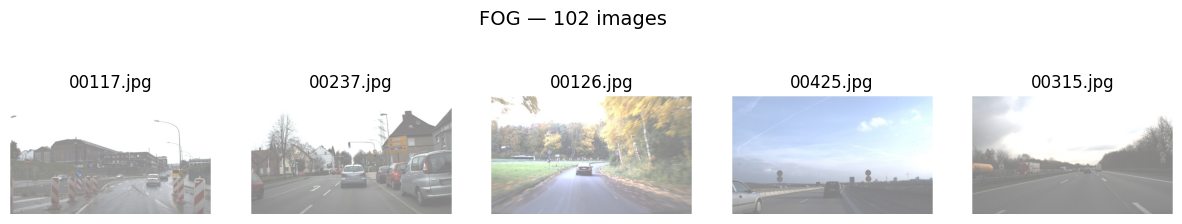

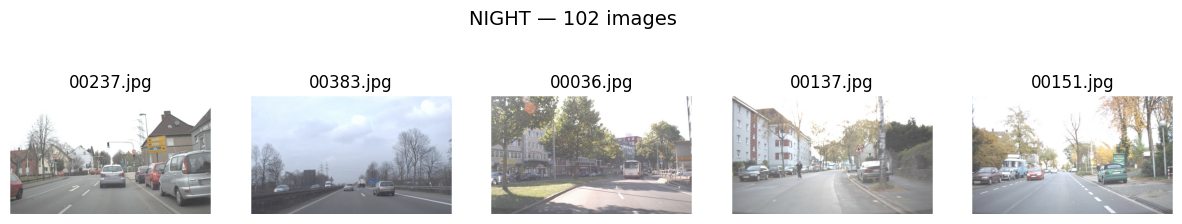

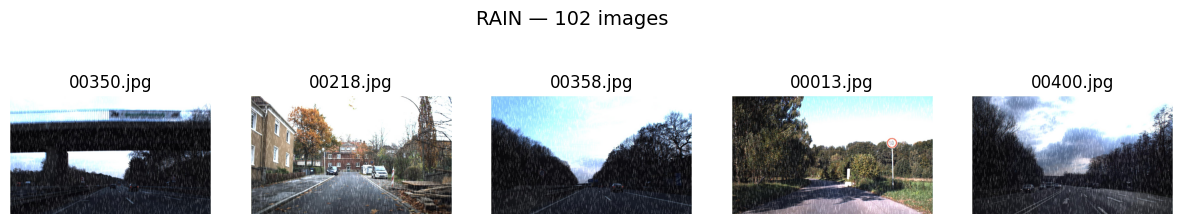

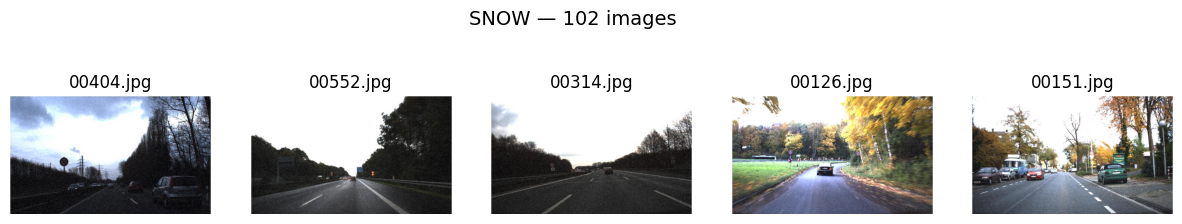

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Paths
PROJECT_DIR = Path("/content")
CLEAN_DIR = Path("/content/traffic-sign-robustness")
DATA_YOLO = CLEAN_DIR / "data_yolo"
DATA_YOLO_WEATHER = PROJECT_DIR / "data_yolo_weather"

conditions = ["fog", "night", "rain", "snow"]

# Map conditions to folders
condition_to_path = {
    "clean": DATA_YOLO/ "images" / "val"
}

for cond in ["fog", "night", "rain", "snow"]:
    condition_to_path[cond] = DATA_YOLO_WEATHER / cond / "images" / "val"

def show_samples(condition, num_samples=5):
    img_folder = condition_to_path[condition]
    img_files = sorted(list(img_folder.glob("*.jpg")))

    if len(img_files) == 0:
        print(f"No images found for condition: {condition}")
        return

    samples = random.sample(img_files, min(num_samples, len(img_files)))

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"{condition.upper()} — {len(img_files)} images", fontsize=14)

    for i, img_path in enumerate(samples):
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_path.name)

    plt.show()


# Show samples for all conditions
for cond in conditions:
    show_samples(cond)


YAML files for each condition

In [ ]:
import yaml

# Load original config for nc and names
with open("traffic-sign-robustness/gtsdb.yaml", "r") as f:
    base_cfg = yaml.safe_load(f)

nc = base_cfg["nc"]
names = base_cfg["names"]

yaml_paths = {}

for cond in conditions:
    ypath = BASE_DIR / f"gtsdb_{cond}.yaml"
    root = weather_dirs[cond]["root"]
    # Note: we only care about val here; train won't be used
    cfg = {
        "path": str(root),
        "train": str(DATA_YOLO / "images" / "train"),
        "val": "images/val",
        "nc": nc,
        "names": names,
    }
    with open(ypath, "w") as f:
        yaml.safe_dump(cfg, f)
    yaml_paths[cond] = ypath

yaml_paths


{'fog': PosixPath('/content/gtsdb_fog.yaml'),
 'night': PosixPath('/content/gtsdb_night.yaml'),
 'rain': PosixPath('/content/gtsdb_rain.yaml'),
 'snow': PosixPath('/content/gtsdb_snow.yaml')}

Evaluation of YOLO on each weather condition

In [ ]:
metrics_by_cond = {}

for cond in conditions:
    print(f"\n=== Evaluating condition: {cond} ===")
    mp = model.val(
        data=str(yaml_paths[cond]),
        imgsz=640,
        batch=16,
        split="val"
    )
    metrics_by_cond[cond] = mp

metrics_by_cond



=== Evaluating condition: fog ===
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 2,692,753 parameters, 0 gradients, 6.9 GFLOPs


val: Scanning /content/data_yolo_weather/fog/labels/val... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 2087.97it/s]

val: New cache created: /content/data_yolo_weather/fog/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]


                   all        102        183      0.452      0.171      0.161      0.122
                     1         12         12      0.309       0.56      0.445      0.365
                     2          9         11       0.21      0.628      0.417      0.285
                     3          3          5          1          0      0.319      0.211
                     4          5          7          0          0     0.0361     0.0292
                     5          7         12     0.0863     0.0833      0.091     0.0743
                     6          2          4      0.164       0.25      0.114     0.0823
                     7          3          4     0.0765        0.5      0.248      0.217
                     8          7         12      0.214      0.341      0.279      0.175
                     9          4          4          0          0     0.0116    0.00878
                    10         10         18      0.336      0.444      0.261      0.202
                    1

val: Scanning /content/data_yolo_weather/night/labels/val... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 2340.99it/s]

val: New cache created: /content/data_yolo_weather/night/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


                   all        102        183      0.399      0.215      0.213      0.162
                     1         12         12      0.331      0.667      0.486      0.417
                     2          9         11      0.248      0.636       0.37      0.246
                     3          3          5      0.119     0.0955      0.208      0.133
                     4          5          7          0          0      0.041     0.0321
                     5          7         12          0          0     0.0806     0.0659
                     6          2          4      0.464        0.5       0.54      0.429
                     7          3          4      0.111       0.75      0.393      0.316
                     8          7         12      0.358      0.333      0.504      0.301
                     9          4          4          0          0     0.0201     0.0145
                    10         10         18      0.377      0.333      0.336      0.251
                    1

val: Scanning /content/data_yolo_weather/rain/labels/val... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 2515.65it/s]

val: New cache created: /content/data_yolo_weather/rain/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]


                   all        102        183      0.414      0.159      0.153      0.113
                     1         12         12      0.454      0.583      0.411      0.348
                     2          9         11      0.267      0.636      0.481      0.321
                     3          3          5      0.378        0.4      0.299      0.221
                     4          5          7          0          0     0.0235     0.0192
                     5          7         12      0.288      0.167      0.212      0.156
                     6          2          4          0          0          0          0
                     7          3          4        0.2       0.75      0.221      0.179
                     8          7         12      0.183      0.167      0.266      0.174
                     9          4          4          0          0    0.00824    0.00534
                    10         10         18      0.351      0.278      0.248      0.163
                    1

val: Scanning /content/data_yolo_weather/snow/labels/val... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 2570.41it/s]

val: New cache created: /content/data_yolo_weather/snow/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]


                   all        102        183      0.552      0.132      0.174      0.129
                     1         12         12      0.458        0.5      0.434      0.352
                     2          9         11      0.267      0.455      0.398      0.247
                     3          3          5          1          0      0.199      0.117
                     4          5          7          0          0     0.0437     0.0345
                     5          7         12          0          0      0.115     0.0849
                     6          2          4          1          0          0          0
                     7          3          4      0.348       0.75      0.477      0.388
                     8          7         12      0.241     0.0833       0.35      0.225
                     9          4          4          0          0     0.0169      0.012
                    10         10         18      0.455      0.188        0.3      0.223
                    1

{'fog': ultralytics.utils.metrics.DetMetrics object with attributes:
 
 ap_class_index: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 30, 32, 33, 35, 36, 37, 38, 40])
 box: ultralytics.utils.metrics.Metric object
 confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79136143df70>
 curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
 curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
           0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.0

In [ ]:
clean_metrics = model.val(
    data=str("traffic-sign-robustness/gtsdb.yaml"),
    imgsz=640,
    batch=16,
    split="val"
)


Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/traffic-sign-robustness/data_yolo/labels/val.cache... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


                   all        102        183       0.48      0.207      0.224      0.168
                     1         12         12       0.32      0.588      0.495      0.425
                     2          9         11      0.274      0.727      0.467      0.307
                     3          3          5      0.111     0.0891      0.188      0.115
                     4          5          7          0          0     0.0427     0.0333
                     5          7         12     0.0316     0.0237     0.0787     0.0626
                     6          2          4      0.665        0.5      0.556      0.445
                     7          3          4      0.123       0.75      0.388      0.314
                     8          7         12      0.362      0.417      0.555       0.31
                     9          4          4          0          0      0.018     0.0127
                    10         10         18      0.436        0.5      0.337      0.246
                    1

comparison table


In [ ]:
def extract_map50(result):
    # Ultralytics `val` returns a Metrics object; one common field is `box.map50`
    return getattr(result.box, "map50", None)

rows = []
rows.append(["clean", extract_map50(clean_metrics)])

for cond in conditions:
    rows.append([cond, extract_map50(metrics_by_cond[cond])])

import pandas as pd
df_map = pd.DataFrame(rows, columns=["condition", "mAP@0.5"])
df_map


,condition,mAP@0.5
0,clean,0.224150
1,fog,0.160611
2,night,0.213340
3,rain,0.152550
4,snow,0.173784


Till here, we:

*    trained YOLOv8n on clean traffic signs
*  generated fog/rain/night/snow versions of the validation set
*  evaluated YOLO on each weather setting
*  got mAP per condition — a quantitative robustness view



In the next part, I will:
* Compute pixel metrics for clean + each weather condition
* Summarize them per condition (for  report)
* Optionally pick example images for visualization

###paths for clean + weather datasets

In [ ]:
from pathlib import Path

PROJECT_DIR = Path("/content/traffic-sign-robustness")
DATA_YOLO = PROJECT_DIR / "data_yolo"
DATA_YOLO_WEATHER = PROJECT_DIR / "data_yolo_weather"

conditions = ["rain", "fog", "night", "snow"]

images_val_clean = DATA_YOLO / "images" / "val"
print("Clean val images:", len(list(images_val_clean.glob("*.jpg"))))


Clean val images: 102


##pixel-level metric functions

In [ ]:
import cv2
import numpy as np

def compute_brightness(gray):
    return float(gray.mean())

def compute_contrast(gray):
    return float(gray.std())

def compute_edge_density(gray, low_thresh=100, high_thresh=200):
    edges = cv2.Canny(gray, low_thresh, high_thresh)
    return float((edges > 0).mean())

def compute_blur(gray):
    # Variance of Laplacian — standard blur metric
    lap = cv2.Laplacian(gray, cv2.CV_64F)
    return float(lap.var())


##metrics for clean + each condition

In [ ]:
import pandas as pd
from tqdm import tqdm

records = []

def process_folder(condition_name, folder_path):
    for img_path in tqdm(sorted(folder_path.glob("*.jpg")), desc=f"{condition_name}"):
        img = cv2.imread(str(img_path))
        if img is None:
            print("No images")
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        brightness = compute_brightness(gray)
        contrast   = compute_contrast(gray)
        edge_dens  = compute_edge_density(gray)
        blur       = compute_blur(gray)

        records.append({
            "condition": condition_name,
            "image": img_path.name,
            "brightness": brightness,
            "contrast": contrast,
            "edge_density": edge_dens,
            "blur_var_lap": blur,
        })

# Clean validation set
process_folder("clean", images_val_clean)

# Weather sets
for cond in conditions:
    print("Condition:", cond, "Folder:", folder, "Num JPG:", len(list(folder.glob("*.jpg"))))
    folder = DATA_YOLO_WEATHER / cond / "images" / "val"
    process_folder(cond, folder)


df_pixels = pd.DataFrame(records)
df_pixels.head()


clean: 100%|██████████| 102/102 [00:02<00:00, 47.21it/s]


NameError: name 'folder' is not defined

##per-condition averages

In [ ]:
summary = df_pixels.groupby("condition").agg({
    "brightness": "mean",
    "contrast": "mean",
    "edge_density": "mean",
    "blur_var_lap": "mean",
}).reset_index()

summary


NameError: name 'df_pixels' is not defined

##Merge with your mAP table

In [ ]:
df_summary_with_map = summary.merge(df_map, on="condition", how="left")
df_summary_with_map


,condition,brightness,contrast,edge_density,blur_var_lap,mAP@0.5
0,clean,125.141088,88.693202,0.060064,778.762346,0.188522


##Visual examples

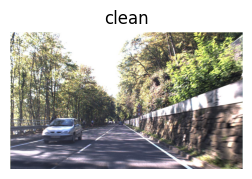

In [ ]:
import matplotlib.pyplot as plt

def show_examples_for_image(img_name_base, max_cols=5):
    paths = []
    titles = []

    # clean
    clean_path = images_val_clean / img_name_base
    if clean_path.exists():
        paths.append(clean_path)
        titles.append("clean")

    for cond in conditions:
        p = DATA_YOLO_WEATHER / cond / "images" / "val" / img_name_base
        if p.exists():
            paths.append(p)
            titles.append(cond)

    n = len(paths)
    if n == 0:
        print("No images found for", img_name_base)
        return

    plt.figure(figsize=(3*min(n, max_cols), 3))
    for i, (p, t) in enumerate(zip(paths, titles)):
        img = cv2.imread(str(p))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(t)
        plt.axis("off")
    plt.show()

# Example usage: pick a filename from clean val
sample_name = sorted([p.name for p in images_val_clean.glob("*.jpg")])[0]
show_examples_for_image(sample_name)


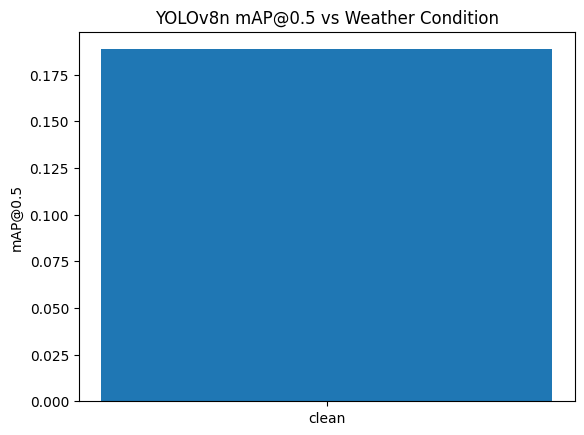

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df_summary_with_map["condition"], df_summary_with_map["mAP@0.5"])
plt.title("YOLOv8n mAP@0.5 vs Weather Condition")
plt.ylabel("mAP@0.5")
plt.show()


In [ ]:
results = model("/content/traffic-sign-robustness/data_yolo/images/val/00003.jpg", save=True)



image 1/1 /content/traffic-sign-robustness/data_yolo/images/val/00003.jpg: 384x640 1 1, 71.3ms
Speed: 3.8ms preprocess, 71.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


In [ ]:
results = model(DATA_YOLO_WEATHER / "fog" / "images" / "val" / "00001.jpg", save=True)


FileNotFoundError: /content/traffic-sign-robustness/data_yolo_weather/fog/images/val/00001.jpg does not exist